In [2]:
%matplotlib inline

/Users/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Calibrate Herschel PACS and SPIRE 1-D spectra for semi-extended objects

## PACS

In [3]:
from pacs_weight import pacs_weight
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits

In [1]:
outdir = '/Users/yaolun/bhr71/best_calibrated/'
cubedir = '/Users/yaolun/bhr71/best_calibrated/bhr71_cube/fits_hsa/'
photpath = '/Users/yaolun/bhr71/best_calibrated/bhr71.txt'

In [4]:
outdir = '/Users/yaolun/L1551-IRS5/'
cubedir = '/Users/yaolun/L1551-IRS5/data/fits/'

### From rebinned cube to 1-D spectra

In [5]:
cubefile = [cubedir+'bhr71_rebinnedcube_blue1.fits',cubedir+'bhr71_rebinnedcube_red1.fits',
            cubedir+'bhr71_rebinnedcube_blue2.fits',cubedir+'bhr71_rebinnedcube_red2.fits']
import pidly
idl = pidly.IDL('/Applications/exelis/idl83/bin/idl')
idl('.r /Users/yaolun/programs/line_fitting/get_pacs.pro')
idl.pro('get_pacs', outdir=cubedir, objname='BHR71', filename=cubefile, suffix='hsa', separate=1)

% Compiled module: GET_PACS.
% Compiled module: GET_PACS_1D.
% Compiled module: GET_PACS_LINESCAN.
% Compiled module: READFITS.
% Compiled module: SXPAR.
% Compiled module: GETTOK.
% Compiled module: VALID_NUM.
% Compiled module: MRD_SKIP.
% Compiled module: HEADFITS.
% Compiled module: FXPOSIT.
% Compiled module: MRD_HREAD.
% Compiled module: AL_LEGEND.
% Compiled module: CGCHECKFORSYMBOLS.
% Compiled module: SETDEFAULTVALUE.
% Compiled module: CGTEXT.
% Compiled module: CGDEFCHARSIZE.
% Compiled module: SETDECOMPOSEDSTATE.
% Compiled module: DECOMPOSEDCOLOR.
% Compiled module: CGDEFAULTCOLOR.
% Compiled module: GETDECOMPOSEDSTATE.
% Compiled module: CGCOLOR24.
% Compiled module: CGPLOTS.
% Compiled module: CGCOLOR.


## L1551-IRS5

In [5]:
cubefile = [cubedir+'hpacs1342192805_20hps3drbs_00.fits',cubedir+'hpacs1342192805_20hps3drrs_00.fits',
            cubedir+'hpacs1342229711_20hps3drbs_00.fits',cubedir+'hpacs1342229711_20hps3drrs_00.fits']

In [6]:
hdu = fits.open(cubefile[0])
hdu[0].header['DATE-OBS']

'2010-03-26T18:18:05.216095'

In [7]:
wl = np.array([])
flux = np.array([])
for cube in cubefile:
    hdu_dum = fits.open(cube)
    wl_min = hdu_dum[8].data.min()
    print wl_min, hdu_dum[0].header['DATE-OBS']
    if wl_min < 60.:
        band = 'b2a'
    elif (wl_min > 60.) & (wl_min < 100):
        band = 'b2b'
    elif (wl_min > 100) & (wl_min < 130):
        band = 'r1s'
    elif wl_min > 130.:
        band = 'r1l'
    print hdu_dum[1].header['CROTA2']
    wl_dum, flux_dum = pacs_weight(outdir+'data/cube/', 'L1551-IRS5', 53,
                                   '/Users/yaolun/L1551-IRS5/data/', cube, suffix='hsa_'+band)
    
    if band == 'b2a':
        trimmer = (wl_dum >= 54.8) & (wl_dum < 72.3)
    elif band == 'b2b':
        trimmer = (wl_dum >= 72.3) & (wl_dum < 95.05)
    elif band == 'r1s':
        trimmer = (wl_dum >= 103) & (wl_dum < 143)
    elif band == 'r1l':
        trimmer = (wl_dum >= 143) & (wl_dum < 190.31)
    
    wl = np.hstack((wl, wl_dum[trimmer]))
    flux = np.hstack((flux, flux_dum[trimmer]))
sorter = np.argsort(wl)
wl = wl[sorter]
flux = flux[sorter]

# write out
foo = open(outdir+'L1551-IRS5_pacs_weighted_53.txt','w')
foo.write('{} \t {}\n'.format('Wavelength(um)', 'Flux_Density(Jy)'))
for i in range(len(wl)):
    foo.write('{} \t {}\n'.format(wl[i], flux[i]))
foo.close()

51.483824604 2010-03-26T18:18:05.216095
183.587366853


/Users/yaolun/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((1000.0, 1000.0), 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Weighted spectrum saved at  /Users/yaolun/L1551-IRS5/data/L1551-IRS5_pacs_weighted_hsa_b2a.txt
101.443497842 2010-03-26T18:18:05.216095
184.428096366
Weighted spectrum saved at  /Users/yaolun/L1551-IRS5/data/L1551-IRS5_pacs_weighted_hsa_r1s.txt
69.7996380066 2011-09-24T11:58:25.141952
4.03933738786
Weighted spectrum saved at  /Users/yaolun/L1551-IRS5/data/L1551-IRS5_pacs_weighted_hsa_b2b.txt
139.575423973 2011-09-24T11:58:25.141952
4.87982346945
Weighted spectrum saved at  /Users/yaolun/L1551-IRS5/data/L1551-IRS5_pacs_weighted_hsa_r1l.txt


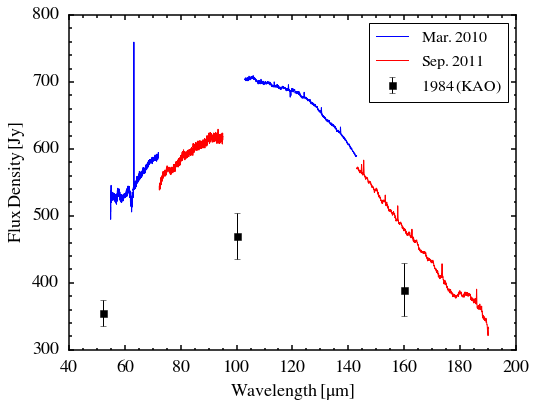

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

e11 = (wl < 72.3)
e12 = ((wl >= 103) & (wl < 143))
e21 = ((wl >= 72.3) & (wl < 95.05))
e22 = ((wl >= 143) & (wl < 190.31))

epoch1, = ax.plot(wl[e11], flux[e11], color='b')
ax.plot(wl[e12], flux[e12], color='b')
epoch2, = ax.plot(wl[e21], flux[e21], color='r')
ax.plot(wl[e22], flux[e22], color='r')
# plt.plot(wl[(wl >= 72.3) & (wl < 95.05)], flux[(wl >= 72.3) & (wl < 95.05)]*1.08)
# plt.errorbar([70,70,160,160], [457.94, 458.89, 441.67, 438.64], yerr=[19.47,19.49,18.04,17.98],
#             fmt='s')
aper53 = ax.errorbar([52,100,160], [355,470,390], yerr=[20,35,40], fmt='s', color='k', markersize=7)
# aper49 = ax.errorbar([58,103,168],[280,512,565],yerr=[84,154,170], fmt='o', color='m', mec='m', markersize=7)

ax.legend([epoch1, epoch2, aper53],
          [r'$\rm{Mar. 2010}$', r'$\rm{Sep. 2011}$', r'$\rm{1984\,(KAO)}$'],
          fontsize=16, numpoints=1, loc='best')
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig(outdir+'L1551-IRS5_53.pdf', format='pdf', dpi=300, bbox_inches='tight')

### Scale L1551-IRS B2B by hand

In [54]:
flux[(wl >= 72.3) & (wl < 95.05)] = flux[(wl >= 72.3) & (wl < 95.05)]*1.08
# write out
foo = open(outdir+'L1551-IRS5_pacs_weighted_scaled.txt','w')
foo.write('{} \t {}\n'.format('Wavelength(um)', 'Flux_Density(Jy)'))
for i in range(len(wl)):
    foo.write('{} \t {}\n'.format(wl[i], flux[i]))
foo.close()

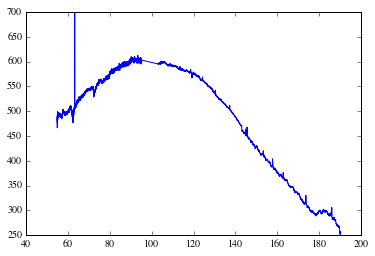

In [55]:
spec = ascii.read(outdir+'L1551-IRS5_pacs_weighted_scaled.txt')
plt.plot(spec['Wavelength(um)'], spec['Flux_Density(Jy)'])

## BHR71

In [4]:
cubefile = [cubedir+'hpacs1342212230_20hps3drbs_00.fits',cubedir+'hpacs1342212230_20hps3drrs_00.fits',
            cubedir+'hpacs1342212231_20hps3drbs_00.fits',cubedir+'hpacs1342212231_20hps3drrs_00.fits']

In [ ]:
wl = np.array([])
flux = np.array([])
for cube in cubefile:
    hdu_dum = fits.open(cube)
    wl_min = hdu_dum[8].data.min()
    if wl_min < 60.:
        band = 'b2a'
    elif (wl_min > 60.) & (wl_min < 100):
        band = 'b2b'
    elif (wl_min > 100) & (wl_min < 130):
        band = 'r1s'
    elif wl_min > 130.:
        band = 'r1l'
    print hdu_dum[1].header['CROTA2']
    wl_dum, flux_dum = pacs_weight(outdir+'bhr71_cube/', 'BHR71', 31.8,
                                   outdir+'bhr71_cube/', cube, suffix='hsa_'+band)
    
    if band == 'b2a':
        trimmer = (wl_dum >= 54.8) & (wl_dum < 72.3)
    elif band == 'b2b':
        trimmer = (wl_dum >= 72.3) & (wl_dum < 95.05)
    elif band == 'r1s':
        trimmer = (wl_dum >= 103) & (wl_dum < 143)
    elif band == 'r1l':
        trimmer = (wl_dum >= 143) & (wl_dum < 190.31)
    
    wl = np.hstack((wl, wl_dum[trimmer]))
    flux = np.hstack((flux, flux_dum[trimmer]))
sorter = np.argsort(wl)
wl = wl[sorter]
flux = flux[sorter]

# write out
foo = open(outdir+'BHR71_pacs_weighted.txt','w')
foo.write('{} \t {}\n'.format('Wavelength(um)', 'Flux_Density(Jy)'))
for i in range(len(wl)):
    foo.write('{} \t {}\n'.format(wl[i], flux[i]))
foo.close()

In [ ]:
wl = np.array([])
flux = np.array([])
for cube in cubefile:
    hdu_dum = fits.open(cube)
    wl_min = hdu_dum[8].data.min()
    if wl_min < 60.:
        band = 'b2a'
    elif (wl_min > 60.) & (wl_min < 100):
        band = 'b2b'
    elif (wl_min > 100) & (wl_min < 130):
        band = 'r1s'
    elif wl_min > 130.:
        band = 'r1l'
    print hdu_dum[1].header['CROTA2']
#     wl_dum, flux_dum = pacs_weight(outdir+'bhr71_cube/', 'BHR71', 31.8,
#                                    outdir+'bhr71_cube/', cube, suffix='hsa_'+band)
    wl_dum, flux_dum = pacs_weight('/Users/yaolun/data/CDF_HSA/BHR71/pacs/data/cube/', 'BHR71', 31.8,
                                   '/Users/yaolun/data/CDF_HSA/BHR71/pacs/data/cube/', cube, suffix='hsa_'+band)
    
    if band == 'b2a':
        trimmer = (wl_dum >= 54.8) & (wl_dum < 72.3)
    elif band == 'b2b':
        trimmer = (wl_dum >= 72.3) & (wl_dum < 95.05)
    elif band == 'r1s':
        trimmer = (wl_dum >= 103) & (wl_dum < 143)
    elif band == 'r1l':
        trimmer = (wl_dum >= 143) & (wl_dum < 190.31)
    
    wl = np.hstack((wl, wl_dum[trimmer]))
    flux = np.hstack((flux, flux_dum[trimmer]))
sorter = np.argsort(wl)
wl = wl[sorter]
flux = flux[sorter]

# write out
foo = open(outdir+'BHR71_pacs_weighted.txt','w')
foo.write('{} \t {}\n'.format('Wavelength(um)', 'Flux_Density(Jy)'))
for i in range(len(wl)):
    foo.write('{} \t {}\n'.format(wl[i], flux[i]))
foo.close()

(50, 200)

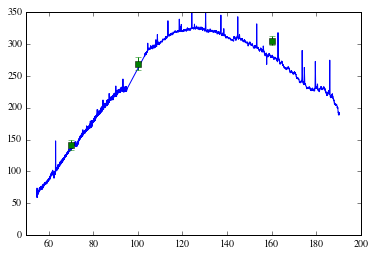

In [36]:
plt.plot(wl, flux)
phot = ascii.read(photpath, comment='%')
plt.errorbar(phot['wavelength'], phot['flux(Jy)'], yerr=phot['error(Jy)'], fmt='s')
plt.xlim([50,200])

### BHR71 calibration without separating individual band

<Container object of 3 artists>

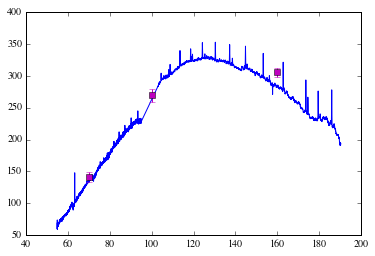

In [18]:
plt.plot(wl, flux)
phot = ascii.read(photpath, comment='%')
plt.errorbar([70, 100, 160], phot['flux(Jy)'][(phot['wavelength'] > 50.) & (phot['wavelength'] < 200.)], 
             yerr=phot['error(Jy)'][(phot['wavelength'] > 50.) & (phot['wavelength'] < 200.)], 
             fmt='s', color='m', linestyle='None')

### Fit the weighted PACS spectrum

In [9]:
idl('.r /Users/yaolun/programs/line_fitting/gauss.pro')
idl('.r /Users/yaolun/programs/line_fitting/extract_pacs.pro')
idl.pro('extract_pacs', indir=outdir, filename='BHR71_pacs_weighted',
        outdir=outdir+'fitting/pacs/advanced_products/',
        plotdir=outdir+'fitting/pacs/advanced_products/plots/', noiselevel=3, ra=0, dec=0, global_noise=20,
        localbaseline=10, opt_width=1, continuum=1, flat=1, object='BHR71', double_gauss=1, fixed_width=1)

% Compiled module: GAUSS.
% Compiled module: EXTRACT_PACS.
% Compiled module: EXTRACT_PACS_LINESCAN.
---> Re-calculating the noise level...


<Container object of 3 artists>

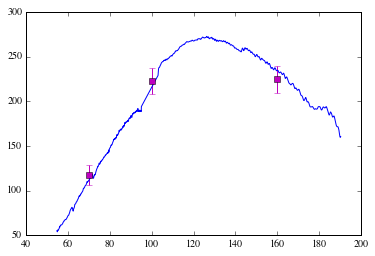

In [9]:
pacs_cont = ascii.read(outdir+'fitting/pacs/advanced_products/BHR71_pacs_weighted_continuum.txt')

plt.plot(pacs_cont['Wavelength(um)'], pacs_cont['Flux_Density(Jy)'])
plt.errorbar([70, 100, 160], phot['flux'], yerr=phot['uncertainty'], fmt='s', color='m', linestyle='None')

## SPIRE

### Call for HIPE

In [ ]:
from subprocess import Popen, call
run = call(['hipe','/Users/programs/spectra_analysis/bhr71_sect_phot.py'])
run.communicate()

<Container object of 3 artists>

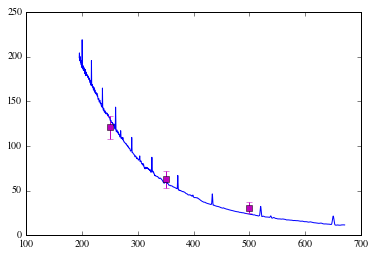

In [9]:
# read in the spectrum
spire_spec = ascii.read(outdir+'spire_sect.txt', data_start=4)
# convert it to the usual format
spire_wl = np.hstack((spire_spec['wave_segm1_0'][spire_spec['wave_segm1_0'] >= 310].data,
            spire_spec['wave_segm2_0'][(spire_spec['wave_segm2_0'] < 310) & (spire_spec['wave_segm2_0'] > 195)].data))
spire_flux = np.hstack((spire_spec['flux_segm1_0'][spire_spec['wave_segm1_0'] >= 310].data,
            spire_spec['flux_segm2_0'][(spire_spec['wave_segm2_0'] < 310) & (spire_spec['wave_segm2_0'] > 195)].data))

sorter = np.argsort(spire_wl)
spire_wl = spire_wl[sorter].data
spire_flux = spire_flux[sorter].data

# Write to file
foo = open(outdir+'BHR71_spire_corrected.txt','w')
foo.write('%s \t %s \n' % ('Wavelength(um)', 'Flux_Density(Jy)'))
for i in range(len(spire_wl)):
    foo.write('%f \t %f \n' % (spire_wl[i], spire_flux[i]))
foo.close()

# read in the photometry
spire_phot = ascii.read(outdir+'phot_sect.txt', data_start=4)

plt.plot(spire_wl, spire_flux)
plt.errorbar(spire_phot['wavelength(um)'], spire_phot['flux(Jy)'], yerr=spire_phot['uncertainty(Jy)'],
             fmt='s', color='m', linestyle='None')

In [50]:
idl('.r /Users/yaolun/programs/line_fitting/gauss.pro')
idl('.r /Users/yaolun/programs/line_fitting/extract_spire.pro')
idl.pro('extract_spire', indir=outdir, filename='BHR71_spire_corrected',
        outdir=outdir+'fitting/spire/advanced_products/',
        plotdir=outdir+'fitting/spire/advanced_products/plots/', noiselevel=3, ra=0, dec=0, global_noise=20,
        localbaseline=10, continuum=1, flat=1, object='BHR71', double_gauss=1, fx=1)

% Compiled module: GAUSS.
% Compiled module: EXTRACT_SPIRE.
---> Re-calculating the noise level...


<Container object of 3 artists>

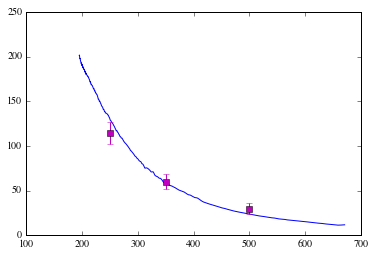

In [51]:
spire_cont = ascii.read(outdir+'fitting/spire/advanced_products/BHR71_spire_corrected_continuum.txt')

plt.plot(spire_cont['Wavelength(um)'], spire_cont['Flux_Density(Jy)'])
plt.errorbar(spire_phot['wavelength(um)'], spire_phot['flux(Jy)'], yerr=spire_phot['uncertainty(Jy)'],
             fmt='s', color='m', linestyle='None')

<Container object of 3 artists>

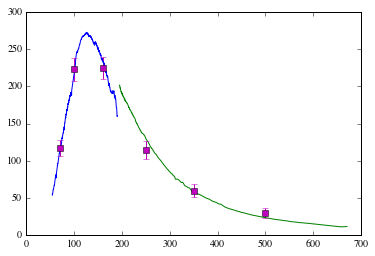

In [52]:
plt.plot(pacs_cont['Wavelength(um)'], pacs_cont['Flux_Density(Jy)'])
plt.errorbar([70, 100, 160], phot['flux'], yerr=phot['uncertainty'], fmt='s', color='m', linestyle='None')

plt.plot(spire_cont['Wavelength(um)'], spire_cont['Flux_Density(Jy)'])
plt.errorbar(spire_phot['wavelength(um)'], spire_phot['flux(Jy)'], yerr=spire_phot['uncertainty(Jy)'],
             fmt='s', color='m', linestyle='None')